In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# link = https://drive.google.com/file/d/1BBN2Y_OFU2JPcLrIR5VePWSWT-qwm9dh/view?usp=sharing

# link = https://drive.google.com/file/d/1YcqLlxb0Smi3zGYKGR3UafheVJUM8i7l/view?usp=drive_link # Dataset_AP_Alugar_residencial.txt
file_id = '1YcqLlxb0Smi3zGYKGR3UafheVJUM8i7l'

url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

In [ ]:
data = data[data['TIPO'].isin(['APARTAMENTO','CASA','CASA EM CONDOMINIO','COBERTURA','KITNET/JK','APARTAMENTO','MOBILIADO'])].reset_index(drop=True)

In [ ]:
dic = {'APARTAMENTO':'APTO','CASA EM CONDOMINIO':'CASA','CASA':'CASA', 'COBERTURA':'APTO',
       'KITNET/JK':'APTO', 'APARTAMENTO GARDEN':'APTO','LOFT':'APTO', 'COBERTURA HORIZONTAL':'APTO'}

data['TIPO2'] = data['TIPO'].map(dic)

K-means

OHE para dados categóricos

In [ ]:
lista_cate = ['TIPO2']
lista_num = ['AREA','QUARTO','GARAGEM','BANHEIRO','MOBILIADO']

In [ ]:
NORMALIZACAO NUMÉRICOS

In [ ]:
# padronização
for col in lista_num:

  data[col+'_z'] = (data[col]-data[col].mean())/data[col].std()

  print(col)

  print(data[col].mean())
  print(data[col].std())

  print(data[col+'_z'].mean())
  print(data[col+'_z'].std())

AREA
77.61233480176212
75.29852115493347
-4.173525613862556e-17
1.0
QUARTO
1.8936170212765957
0.8487765477158118
6.777003349142555e-17
1.0
GARAGEM
0.6625091709464417
0.8835932555199063
-5.213079499340427e-17
1.0
BANHEIRO
1.4849596478356566
0.882216421795053
4.170463599472342e-17
0.9999999999999999
MOBILIADO
0.11885546588407923
0.32367773589930793
-1.563923849802128e-17
1.0


In [ ]:
#
data = pd.concat([data,pd.get_dummies(data['TIPO2'])],axis=1)

In [ ]:
data = data.dropna()

X = data[['APTO','CASA','MOBILIADO','AREA_z','QUARTO_z','GARAGEM_z','BANHEIRO_z']]

In [ ]:
sse = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0,init='k-means++',n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
print(sse)

[5783.958659157943, 4219.593033607497, 3537.6415972770355, 3122.9041716107304, 2803.648342211158, 2608.8665175636324, 2432.693413971044, 2263.6948697043395, 2094.4852967324714, 2006.7849852200038, 1884.8758280566935, 1799.9593349285628, 1700.2775781089726, 1621.5620084248708, 1557.5949914769312, 1497.6126545812244, 1424.9297977000924, 1384.7746939248646]


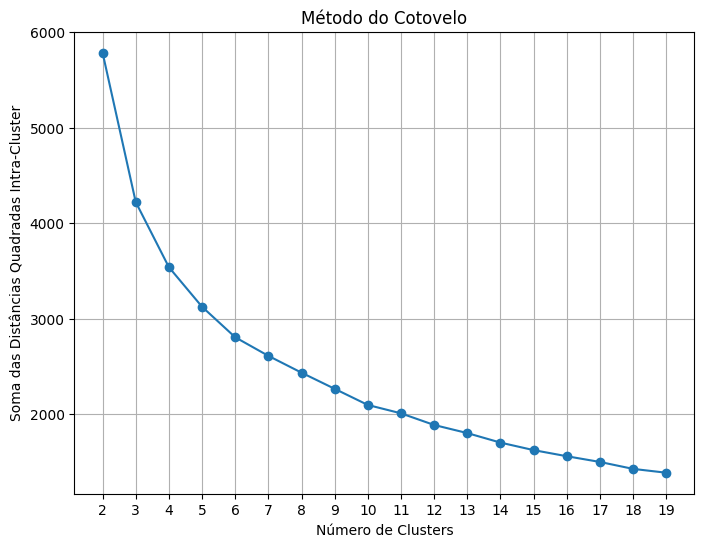

In [ ]:

# Plotar o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Quadradas Intra-Cluster')
plt.xticks(range(2, 20))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6,init='k-means++',n_init=20,random_state=0)
kmeans.fit(X)

# fazer metodo do cotovelo para escolher cluster

KMeans(n_clusters=6, n_init=20, random_state=0)

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
data['VALOR_METRO2'] = data['VALORES']/data['AREA']

In [ ]:
data.groupby(['cluster']).agg({'VALOR_METRO2':'mean'}).reset_index()

,cluster,VALOR_METRO2
0,0,52.241224
1,1,39.616308
2,2,36.784535
3,3,28.308221
4,4,32.915000
5,5,39.926808


In [ ]:
df_centroides = pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)
df_centroides

,APTO,CASA,MOBILIADO,AREA_z,QUARTO_z,GARAGEM_z,BANHEIRO_z
0,0.998686,0.001314,0.164258,-0.488655,-1.052830,-0.461277,-0.409693
1,0.833333,0.166667,0.099291,0.530528,1.236657,0.514391,0.913405
2,0.245098,0.754902,0.137255,2.260225,1.419010,2.301477,1.839553
3,0.980119,0.019881,0.049702,-0.154587,0.275243,-0.749790,-0.367173
4,0.095238,0.904762,0.119048,4.918923,3.182959,2.914900,4.632048
5,0.951477,0.048523,0.109705,-0.162371,0.199904,0.546700,-0.181435


In [ ]:
# seaborn.pairplot(data[['TIPO','AREA','QUARTO','GARAGEM','BANHEIRO','MOBILIADO','cluster']],hue='cluster',palette='viridis')

NameError: ignored

In [ ]:
aux_loc = data.groupby(['LOCATION']).agg({'VALORES':'sum','AREA':'sum'}).reset_index()

In [ ]:
aux_loc['METRAGEM'] = aux_loc['VALORES']/aux_loc['AREA']

In [ ]:
for cluster in [0,1,2,3,4,5]:

    print(cluster)
    df_cluster = data[data['cluster'] == cluster].reset_index(drop=True)
    df_cluster = df_cluster.groupby(['LOCATION']).agg({'VALORES': 'sum', 'AREA': 'sum'}).reset_index()
    df_cluster['cluster_' + str(cluster)] = df_cluster['VALORES'] / df_cluster['AREA']

    aux_loc = pd.merge(aux_loc, df_cluster[['LOCATION', 'cluster_' + str(cluster)]],
                       on=['LOCATION'], how='left')




0
1
2
3
4
5


In [ ]:
aux_loc = aux_loc.sort_values(by=['METRAGEM']).reset_index(drop=True)

In [ ]:

df = aux_loc[['LOCATION', 'cluster_0', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4','cluster_5']]


In [ ]:
# list_cols = ['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','cluster_5']

# df['aux'] = df[['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','cluster_5']].mean(axis=1)

# for cols in list_cols:
#     # aux = df[cols].dropna()
#     # df[cols] = df[cols].fillna(aux.mean())

#     df[cols] = np.where(df[cols].isnull(), df['aux']*df[cols].mean()/df['aux'].mean(),
#                         df[cols])
#     # df[cols+'_ajust'] = df[cols] - df[cols].iloc[:5].mean()

In [ ]:
list_cols = ['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','cluster_5']

# df['aux'] = df[['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4','cluster_5']].mean(axis=1)

for cols in list_cols:

    # Use forward fill within each row (neighborhood)
    df[cols] = df[cols].fillna(method='ffill')
    # Then use backward fill to fill any remaining NaNs
    df[cols] = df[cols].fillna(method='bfill')


<ipython-input-179-abb29fe856bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].fillna(method='ffill')
<ipython-input-179-abb29fe856bc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].fillna(method='bfill')


In [ ]:
df =df.reset_index()
df['BAIRROS'] = df['index']+1

In [ ]:
def poly_func(x,coeff,intercet):

  if intercet == True:

    # y = x*x*x*x*coeff[0] + x*x*x*coeff[1] + x*x*coeff[2] + x*coeff[3] + coeff[4]

    # y = x*x*x*coeff[0] + x*x*coeff[1] + x*coeff[2] + coeff[3]

    y = x*x*coeff[0] + x*coeff[1] + coeff[2]

    # y = x*coeff[0] + coeff[1]

  else:

    y = x*x*coeff[0] + x*coeff[1]

  return(y)

In [ ]:

# Fit a polynomial of degree 2 (quadratic) to the data
degree = 2

coeff0 = np.polyfit(df['BAIRROS'], df['cluster_0'], degree)
coeff1 = np.polyfit(df['BAIRROS'], df['cluster_1'], degree)
coeff2 = np.polyfit(df['BAIRROS'], df['cluster_2'], degree)
coeff3 = np.polyfit(df['BAIRROS'], df['cluster_3'], degree)
coeff4 = np.polyfit(df['BAIRROS'], df['cluster_4'], degree)
coeff5 = np.polyfit(df['BAIRROS'], df['cluster_5'], degree)


In [ ]:
df['cl0_ajust'] = poly_func(df['BAIRROS'],coeff0,True)
df['cl1_ajust'] = poly_func(df['BAIRROS'],coeff1,True)
df['cl2_ajust'] = poly_func(df['BAIRROS'],coeff2,True)
df['cl3_ajust'] = poly_func(df['BAIRROS'],coeff3,True)
df['cl4_ajust'] = poly_func(df['BAIRROS'],coeff4,True)
df['cl5_ajust'] = poly_func(df['BAIRROS'],coeff5,True)

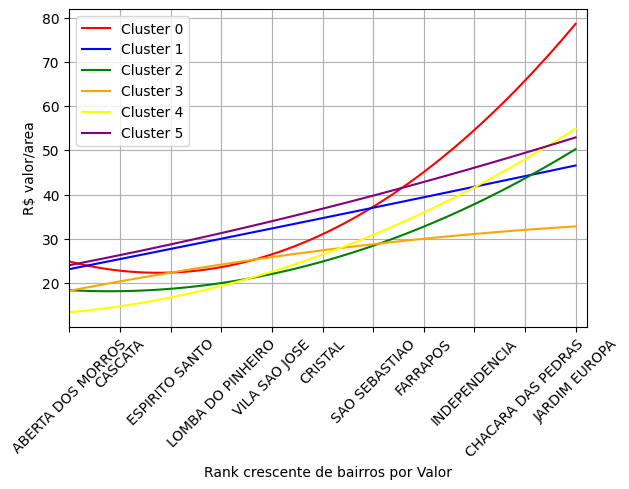

In [ ]:

# Plot the smooth curve
plt.plot(df['LOCATION'], df['cl0_ajust'] , color='red', label='Cluster 0')
plt.plot(df['LOCATION'], df['cl1_ajust'] , color='blue', label='Cluster 1')
plt.plot(df['LOCATION'], df['cl2_ajust'] , color='green', label='Cluster 2')
plt.plot(df['LOCATION'], df['cl3_ajust'] , color='orange', label='Cluster 3')
plt.plot(df['LOCATION'], df['cl4_ajust'] , color='yellow', label='Cluster 4')
plt.plot(df['LOCATION'], df['cl5_ajust'] , color='purple', label='Cluster 5')

plt.xlim(0, 92)

total_points = len(df)
num_labels = 10  # You can adjust this based on your preference

# Calculate the step size for selecting the ticks to display
step = max(1, total_points // num_labels)

# Select the indices for the ticks you want to display
selected_indices = range(0, total_points, step)

# Set the xticks and corresponding labels
plt.xticks(df['LOCATION'][selected_indices], rotation=45)

plt.tight_layout()

# plt.title('Valor/area por cluster e localização')
plt.ylabel('R$ valor/area')
plt.xlabel('Rank crescente de bairros por Valor')
plt.legend()
plt.grid(True)
plt.show()

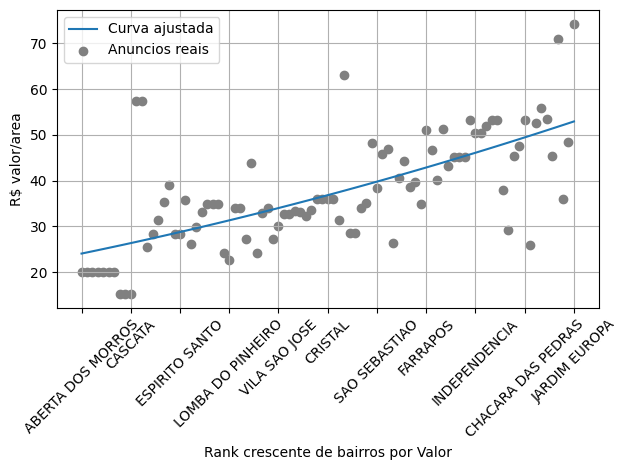

In [ ]:


# Your plotting code
plt.plot(df['LOCATION'], df['cl5_ajust'], label='Curva ajustada')

plt.scatter(df['LOCATION'], df['cluster_5'], color='grey', label='Anuncios reais')

plt.ylabel('R$ valor/area')
plt.xlabel('Rank crescente de bairros por Valor')
plt.legend()
plt.grid(True)

# Get the total number of data points and decide how many labels you want to display
total_points = len(df)
num_labels = 10  # You can adjust this based on your preference

# Calculate the step size for selecting the ticks to display
step = max(1, total_points // num_labels)

# Select the indices for the ticks you want to display
selected_indices = range(0, total_points, step)

# Set the xticks and corresponding labels
plt.xticks(df['LOCATION'][selected_indices], rotation=45)

plt.tight_layout()
plt.show()


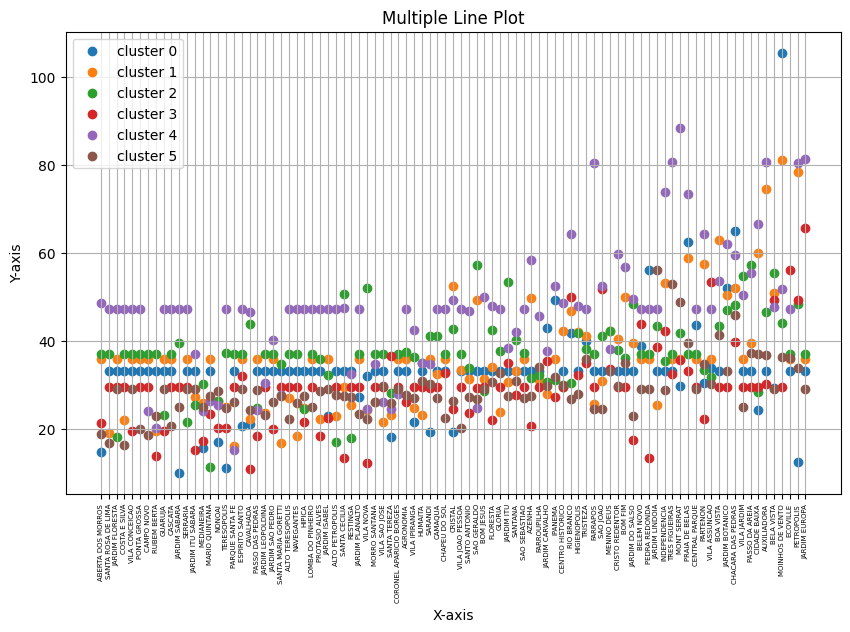

In [ ]:


# Plotting multiple lines
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df['LOCATION'], df['cluster_0'], label='cluster 0')
plt.scatter(df['LOCATION'], df['cluster_1'], label='cluster 1')
plt.scatter(df['LOCATION'], df['cluster_2'], label='cluster 2')
plt.scatter(df['LOCATION'], df['cluster_3'], label='cluster 3')
plt.scatter(df['LOCATION'], df['cluster_4'], label='cluster 4')
plt.scatter(df['LOCATION'], df['cluster_5'], label='cluster 5')

plt.title('Multiple Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.xticks(rotation='vertical', fontsize=5)  # Adjust rotation and fontsize as needed
plt.grid(True)
plt.show()




# KNN para geração de grid

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df['efeito_loc'] = (df['cl0_ajust']+df['cl1_ajust']+df['cl2_ajust']+df['cl3_ajust']+df['cl4_ajust']+df['cl5_ajust'])/6

In [ ]:
# df['efeito_loc_norm'] = df['efeito_loc']

In [ ]:
loc = data[data['LAT_STREET']!='-'].reset_index(drop=True)

loc['LAT_STREET'] = loc['LAT_STREET'].astype(float)

loc['LON_STREET'] = loc['LON_STREET'].astype(float)

loc = loc.groupby(['LOCATION']).agg({'LAT_STREET':'mean','LON_STREET':'mean'}).reset_index()

In [ ]:
df = df.merge(loc, on = 'LOCATION', how = 'left', validate = '1:1')

In [ ]:
df_model = df.dropna(subset=['LAT_STREET','LON_STREET'])

In [ ]:
x = df_model[['LAT_STREET','LON_STREET']]
y = df_model['efeito_loc']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5,metric='euclidean',weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [ ]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 20.94
R-squared: 0.25


In [ ]:
grid_lat = [-29.95 +  i*-0.00031 for i in range(0,1001)]
grid_lon = [-51.27 +  i*0.00024 for i in range(0,1001)]

In [ ]:
aux = []

for item1 in grid_lat:
    for item2 in grid_lon:
        aux.append([item1, item2])

X_test2 = pd.DataFrame(aux, columns=['LAT_STREET', 'LON_STREET'])

In [ ]:
X_test2['MODEL_PREDICTION'] = knn.predict(X_test2)

In [ ]:
X_test2.to_csv('/content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/grid_valores.csv',sep=';',decimal=',')

In [ ]:
data = data[data['LAT_STREET']!='-'].reset_index(drop=True)
data['fator_loc'] = knn.predict(data[['LAT_STREET', 'LON_STREET']])
data.to_csv('/content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/data_modelo.csv',sep=';',decimal=',')

# Modelo de previsão de valor de imóvel

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
data.groupby(['cluster']).agg({'VALORES':['std','mean','min','max'],'VALOR_CORRIGIDO':['std','mean','min','max']})

VALORES                            VALOR_CORRIGIDO                \
                 std          mean   min    max             std          mean   
cluster                                                                         
0        6682.248261  12908.256410  3986  32337     6579.681981  10955.445532   
1        1115.217655   1858.519810   401   8002     1062.462022   1551.948949   
2        1927.962455   3867.482234  1200  19285     1717.912067   3114.082569   
3        4746.618855   8077.120690  2500  29970     4435.294325   6561.686936   
4        1578.754562   3227.545852   690  10472     1422.034684   2743.356374   
5         795.703048   1887.609244   650   6355      687.970501   1479.180440   

                                   
                min           max  
cluster                            
0       -126.955165  30286.757974  
1        153.752843   7494.308130  
2        -85.782088  17334.259803  
3        846.672317  26551.541408  
4        537.556749   9061.625144  
5        195.606031   4956.281135

In [ ]:
data['VALOR_CORRIGIDO'] = data['VALORES'] - data['fator_loc']*data['AREA']

In [ ]:
data_model = data.copy()

In [ ]:
#pre porcessamento variaveis categoricas

data_model = pd.concat([data_model,pd.get_dummies(data_model['LOCATION'])],axis=1)

data_model = pd.concat([data_model,pd.get_dummies(data_model['RUA/AV'])],axis=1)

In [ ]:
x = data_model[['APTO','CASA', 'AREA_z', 'QUARTO_z', 'GARAGEM_z', 'BANHEIRO_z',
       'MOBILIADO_z', 'APTO', 'CASA', 'cluster', 'fator_loc','MOBILIADO','AREA',
    'ABERTA DOS MORROS',    'AGRONOMIA',    'ALTO PETROPOLIS',    'ALTO TERESOPOLIS',
    'AUXILIADORA',    'AZENHA',    'BELA VISTA',    'BELEM NOVO',    'BOA VISTA',
    'BOM FIM',    'BOM JESUS',    'CAMAQUA',    'CAMPO NOVO',    'CASCATA',
    'CAVALHADA',    'CENTRO HISTORICO',    'CHACARA DAS PEDRAS',    'CHAPEU DO SOL',
    'CIDADE BAIXA',    'CORONEL APARICIO BORGES',    'COSTA E SILVA',    'CRISTAL',
    'CRISTO REDENTOR',    'ECOVILLE',    'ESPIRITO SANTO',    'FARRAPOS',
    'FARROUPILHA',    'FLORESTA',    'GLORIA',    'GUARUJA',    'HIGIENOPOLIS',
    'HIPICA',    'HUMAITA',    'INDEPENDENCIA',    'IPANEMA',    'JARDIM BOTANICO',
    'JARDIM CARVALHO',    'JARDIM DO SALSO',    'JARDIM EUROPA',    'JARDIM FLORESTA',
    'JARDIM ISABEL',    'JARDIM ITU',    'JARDIM ITU SABARA',    'JARDIM LEOPOLDINA',
    'JARDIM LINDOIA',    'JARDIM PLANALTO',    'JARDIM SABARA',
    'JARDIM SAO PEDRO',    'LOMBA DO PINHEIRO',    'MARIO QUINTANA',
    'MEDIANEIRA',    'MENINO DEUS',    'MOINHOS DE VENTO',    'MONT SERRAT',
    'MORRO SANTANA',    'NAVEGANTES',    'NONOAI',    'PARQUE SANTA FE',
    'PARTENON',    'PASSO DA AREIA',    'PASSO DAS PEDRAS',    'PEDRA REDONDA',
    'PETROPOLIS',    'PONTA GROSSA',    'PRAIA DE BELAS',    'PROTASIO ALVES',
    'RESTINGA',    'RIO BRANCO',    'RUBEM BERTA',    'SANTA CECILIA',
    'SANTA MARIA GORETTI',    'SANTA ROSA DE LIMA',    'SANTA TEREZA',
    'SANTANA',    'SANTO ANTONIO',    'SAO GERALDO',    'SAO JOAO',
    'SAO SEBASTIAO',    'SARANDI',    'SERRARIA',    'TERESOPOLIS',
    'TRES FIGUEIRAS',    'TRISTEZA',    'VILA ASSUNCAO',    'VILA CONCEICAO',
    'VILA IPIRANGA',    'VILA JARDIM',    'VILA JOAO PESSOA',    'VILA NOVA',
    'VILA SAO JOSE',    'ACESSO',    'ALAMEDA',    'AVENIDA',    'BECO',
    'ESTRADA',    'LARGO',    'PRACA',    'RUA',    'TRAVESSA']]

In [ ]:
y = data_model['VALORES']

In [ ]:

# Criar instâncias dos modelos
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    #'XGBoost': XGBClassifier(),
    'KNN': KNeighborsRegressor()
}

# Executar a validação cruzada
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = scores

# Exibir os resultados
for model_name, scores in results.items():
    print(f'{model_name}: Média da acurácia = {np.mean(scores):.4f}, Desvio padrão = {np.std(scores):.4f}')

ValueError: ignored